In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_error
import joblib
import pickle 


In [2]:
data=pd.read_csv(r"D:\projectyoutube\banking\clean_credit_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     100000 non-null  int64  
 1   Annual_Income                  100000 non-null  float64
 2   Monthly_Inhand_Salary          100000 non-null  float64
 3   Num_Bank_Accounts              100000 non-null  int64  
 4   Num_Credit_Card                100000 non-null  int64  
 5   Interest_Rate                  100000 non-null  int64  
 6   Num_of_Loan                    100000 non-null  int64  
 7   Delay_from_due_date            100000 non-null  int64  
 8   Num_of_Delayed_Payment         100000 non-null  int64  
 9   Changed_Credit_Limit           100000 non-null  float64
 10  Num_Credit_Inquiries           100000 non-null  float64
 11  Outstanding_Debt               100000 non-null  float64
 12  Credit_Utilization_Ratio       

Encoding Credit score column

In [4]:
data["Credit_Score"] = data["Credit_Score"].map({"Standard": 1, 
                               "Good": 2, 
                               "Poor": 0})

In [5]:
data.isnull().sum()

Unnamed: 0                       0
Annual_Income                    0
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries             0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age               0
Total_EMI_per_month              0
Amount_invested_monthly          0
Monthly_Balance                  0
Credit_Score                     0
encoded_ Credit_Mix              0
encoded_Occupation               0
encoded_Payment_of_Min_Amount    0
encoded_Payment_Behaviour        0
encoded_ Type_of_Loan            0
dtype: int64

In [6]:
data.describe().corr()

,Unnamed: 0,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,encoded_ Credit_Mix,encoded_Occupation,encoded_Payment_of_Min_Amount,encoded_Payment_Behaviour,encoded_ Type_of_Loan
Unnamed: 0,1.000000,0.925941,0.603645,0.520196,0.520194,0.520351,0.520179,0.520492,0.520297,0.520314,...,0.523056,0.522306,0.521048,0.525310,0.520132,0.520132,0.520224,0.520133,0.520158,0.566566
Annual_Income,0.925941,1.000000,0.451768,0.352467,0.352465,0.352642,0.352454,0.352808,0.352564,0.352608,...,0.355311,0.354994,0.353429,0.357855,0.352401,0.352399,0.352493,0.352398,0.352424,0.399394
Monthly_Inhand_Salary,0.603645,0.451768,1.000000,0.994112,0.994111,0.994132,0.994110,0.994151,0.994123,0.994128,...,0.994438,0.994401,0.994223,0.994721,0.994104,0.994104,0.994115,0.994104,0.994107,0.998119
Num_Bank_Accounts,0.520196,0.352467,0.994112,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999994,0.999996,0.999999,0.999981,1.000000,1.000000,1.000000,1.000000,1.000000,0.998464
Num_Credit_Card,0.520194,0.352465,0.994111,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999994,0.999996,0.999999,0.999981,1.000000,1.000000,1.000000,1.000000,1.000000,0.998464
Interest_Rate,0.520351,0.352642,0.994132,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999995,0.999997,1.000000,0.999982,1.000000,1.000000,1.000000,1.000000,1.000000,0.998474
Num_of_Loan,0.520179,0.352454,0.994110,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999994,0.999996,0.999999,0.999981,1.000000,1.000000,1.000000,1.000000,1.000000,0.998463
Delay_from_due_date,0.520492,0.352808,0.994151,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999995,0.999997,1.000000,0.999983,1.000000,1.000000,1.000000,1.000000,1.000000,0.998483
Num_of_Delayed_Payment,0.520297,0.352564,0.994123,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999995,0.999997,1.000000,0.999982,1.000000,1.000000,1.000000,1.000000,1.000000,0.998470
Changed_Credit_Limit,0.520314,0.352608,0.994128,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999995,0.999997,1.000000,0.999982,1.000000,1.000000,1.000000,1.000000,1.000000,0.998471


Check for Relevance

In [7]:
# Identify potential target columns
potential_targets = data.select_dtypes(include=['float64', 'int64']).columns
print("Potential target columns:", potential_targets)

Potential target columns: Index(['Unnamed: 0', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'encoded_ Credit_Mix',
       'encoded_Occupation', 'encoded_Payment_of_Min_Amount',
       'encoded_Payment_Behaviour', 'encoded_ Type_of_Loan'],
      dtype='object')


Correlation Analysis

In [8]:
# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                               Unnamed: 0  Annual_Income  \
Unnamed: 0                       1.000000      -0.005838   
Annual_Income                   -0.005838       1.000000   
Monthly_Inhand_Salary           -0.004919       0.996597   
Num_Bank_Accounts                0.004826      -0.281692   
Num_Credit_Card                 -0.001900      -0.218147   
Interest_Rate                    0.003957      -0.301453   
Num_of_Loan                     -0.010136      -0.256198   
Delay_from_due_date             -0.005158      -0.250847   
Num_of_Delayed_Payment           0.001859      -0.282877   
Changed_Credit_Limit             0.008557      -0.175628   
Num_Credit_Inquiries            -0.001921      -0.280774   
Outstanding_Debt                 0.003758      -0.276275   
Credit_Utilization_Ratio        -0.005400       0.174156   
Credit_History_Age              -0.005603       0.271640   
Total_EMI_per_month             -0.007426       0.494505   
Amount_invested_monthly         -0.00527

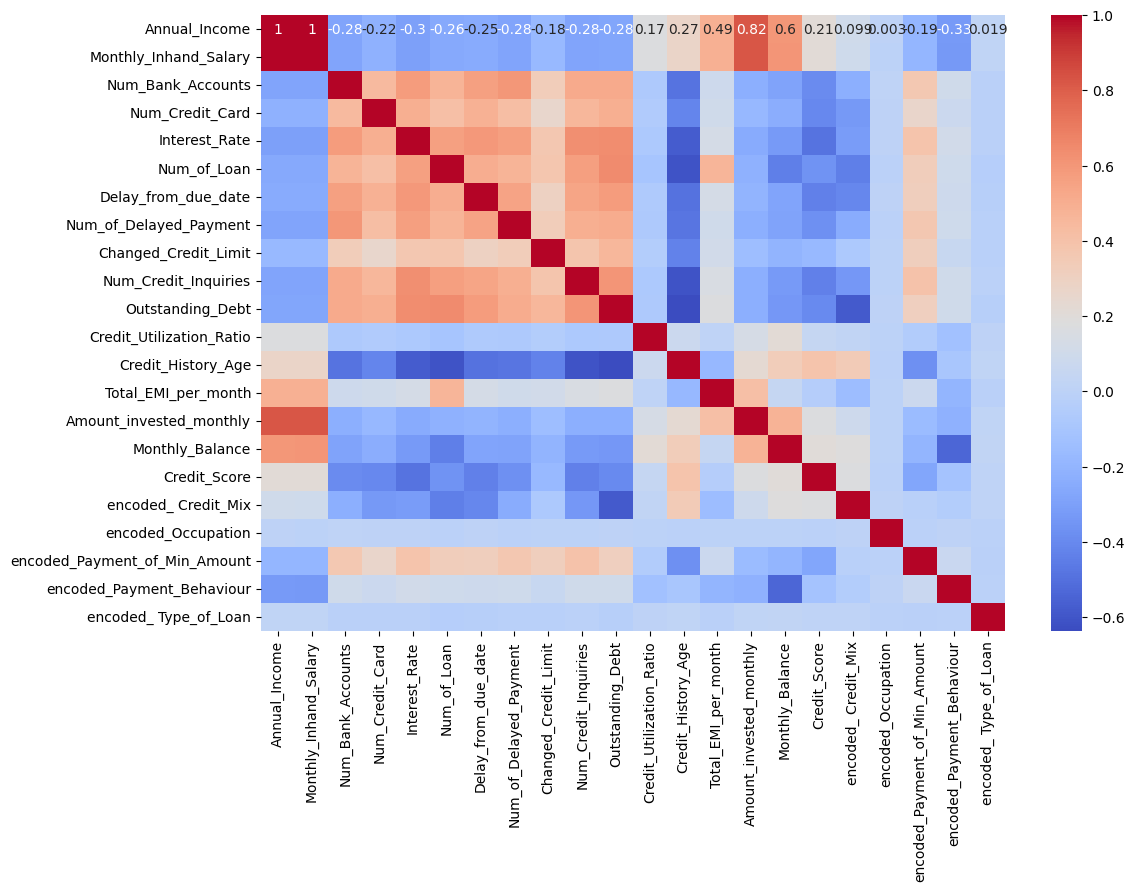

In [54]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [55]:
data.columns

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'encoded_ Credit_Mix',
       'encoded_Occupation', 'encoded_Payment_of_Min_Amount',
       'encoded_Payment_Behaviour', 'encoded_ Type_of_Loan'],
      dtype='object')

Target looks like regression


d:\projectyoutube\.venv\lib\site-packages\dabl\plot\supervised.py:107: UserWarning: Not plotting highly correlated (0.9926676221198479) feature Monthly_Inhand_Salary. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"
d:\projectyoutube\.venv\lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()
d:\projectyoutube\.venv\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\projectyoutube\.venv\lib\s

[<Axes: title={'center': 'Target distribution'}, xlabel='Total_EMI_per_month', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=5.82E-01'}, xlabel='Num_of_Loan (jittered)', ylabel='Total_EMI_per_month'>,
         <Axes: title={'center': 'F=4.90E-01'}, xlabel='Annual_Income'>,
         <Axes: title={'center': 'F=4.01E-01'}, xlabel='Amount_invested_monthly'>,
         <Axes: title={'center': 'F=-2.22E-01'}, xlabel='Credit_History_Age (jittered)'>,
         <Axes: title={'center': 'F=1.99E-01'}, xlabel='Num_Credit_Inquiries (jittered)'>],
        [<Axes: title={'center': 'F=1.83E-01'}, xlabel='Outstanding_Debt', ylabel='Total_EMI_per_month'>,
         <Axes: title={'center': 'F=1.62E-01'}, xlabel='Interest_Rate (jittered)'>,
         <Axes: title={'center': 'F=1.49E-01'}, xlabel='Delay_from_due_date (jittered)'>,
         <Axes: title={'center': 'F=1.36E-01'}, xlabel='Num_of_Delayed_Payment (jittered)'>,
         <Axes: title={'center': 'F=1.25E-01'}, xlabel='Num_Bank_Accounts (ji

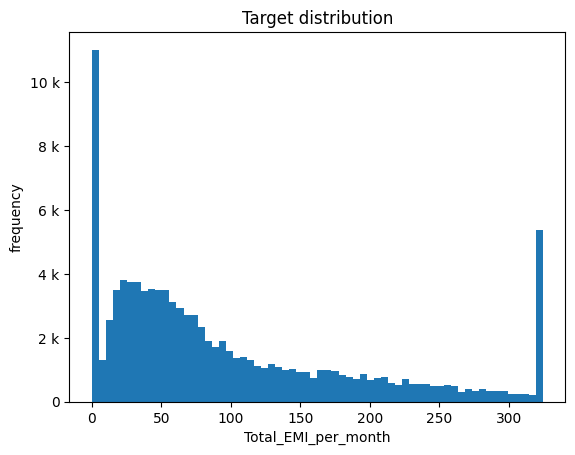

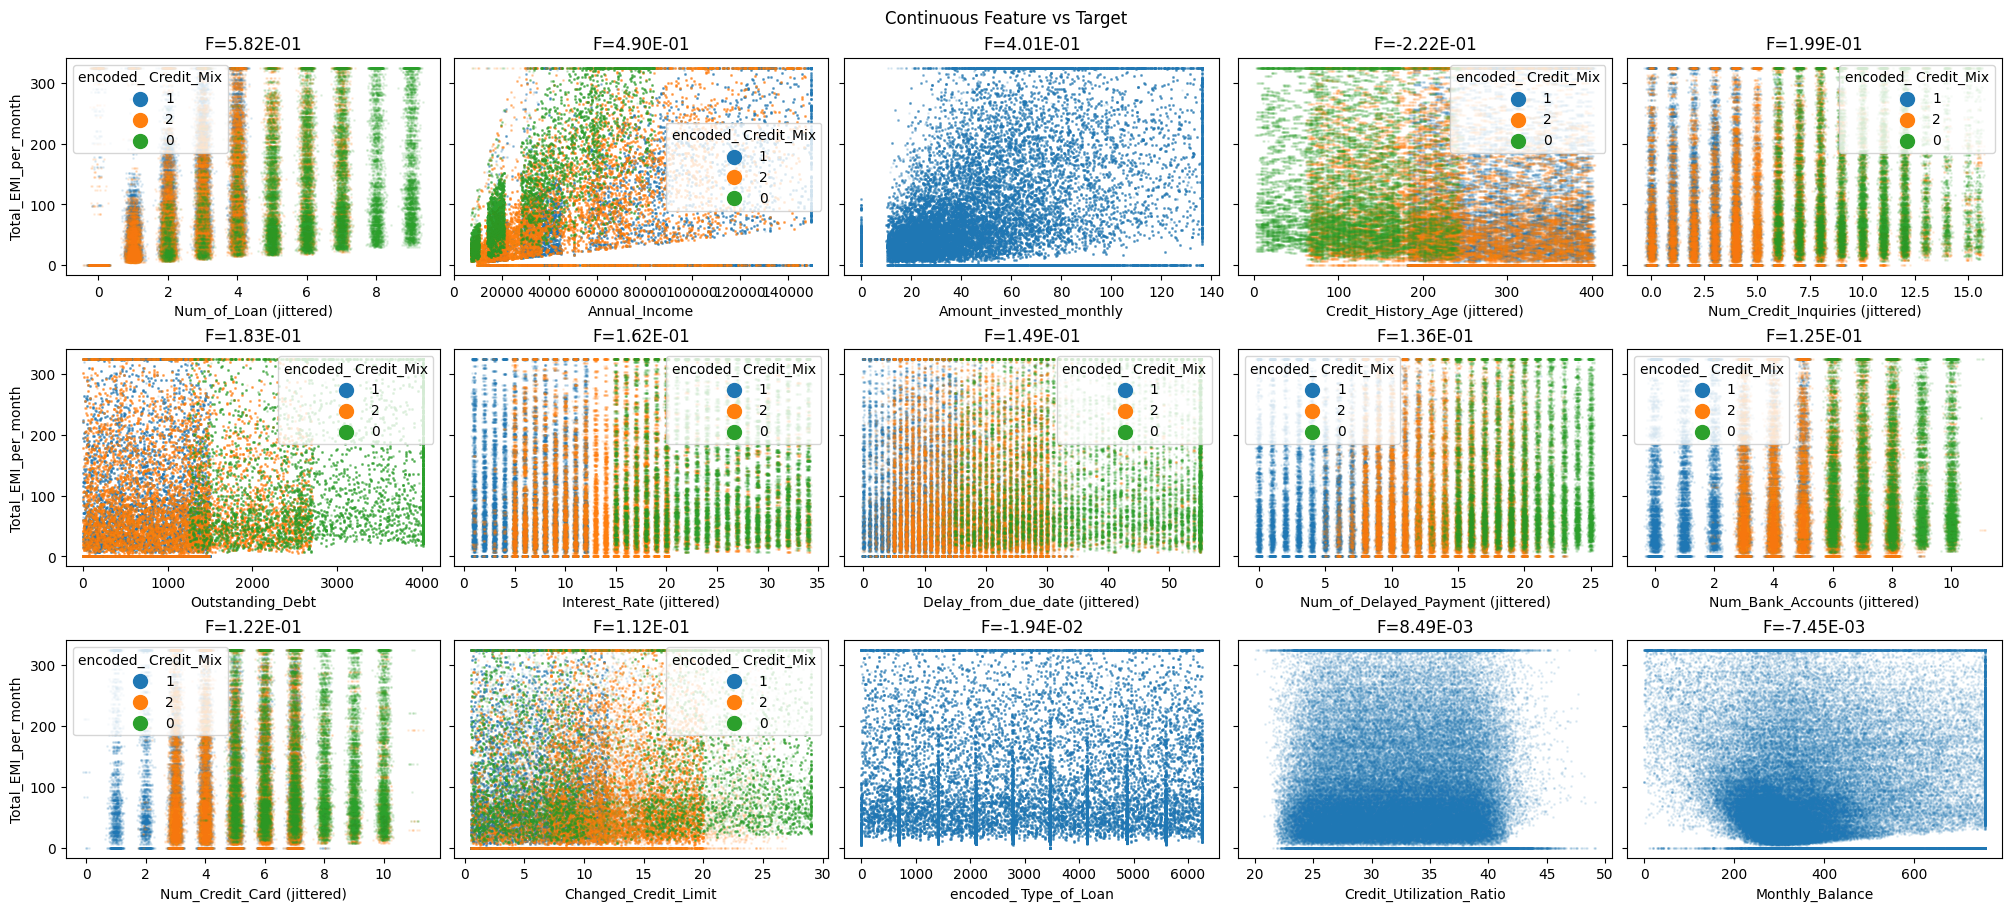

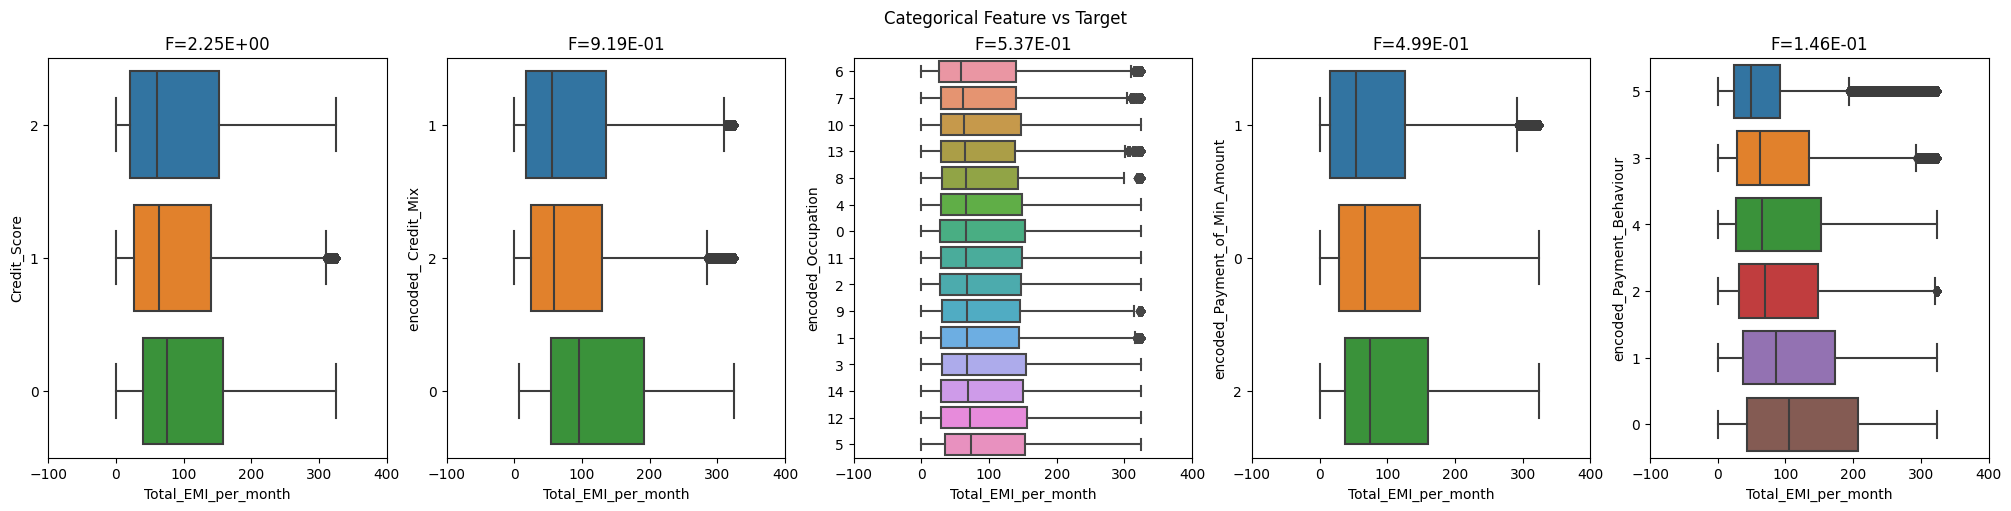

In [66]:
#automated eda
import dabl
dabl.plot(data, target_col="Total_EMI_per_month")

In [9]:
x = np.array(data[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
                    'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                    'Num_Credit_Inquiries',  'Outstanding_Debt','encoded_ Credit_Mix',
                     'encoded_Payment_of_Min_Amount',"Amount_invested_monthly",'Credit_History_Age',
                    'encoded_Payment_Behaviour', 'Monthly_Balance',"Credit_Score"]])
y = np.array(data[['Total_EMI_per_month']])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (80000, 18)
Number transactions y_train dataset:  (80000, 1)
Number transactions X_test dataset:  (20000, 18)
Number transactions y_test dataset:  (20000, 1)


In [22]:
# Creating dataframes for testing and training evaluation metrics
training_eval_df=pd.DataFrame(columns=["Model",'Mean Absolute Error','Mean Square Error','R2 Score','Root Mean Square Error'])
testing_eval_df=pd.DataFrame(columns=['Model','Mean Absolute Error','Mean Square Error','R2 Score','Root Mean Square Error'])

In [11]:
regm1=DecisionTreeRegressor(random_state = 42)  
  
# fit the regressor with X and Y data 
regm1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [23]:
#Training Data
y_train_pred = regm1.predict(X_train)
mae = mean_absolute_error(y_train_pred,y_train)
mse= mean_squared_error(y_train_pred,y_train)
r2=r2_score(y_train_pred,y_train)
rmse=np.sqrt(mean_squared_error(y_train_pred,y_train))
training_eval_df.loc[len(training_eval_df.index)] = ['Decision Tree', mae,mse,r2,rmse] 

In [39]:
training_eval_df

,Model,Mean Absolute Error,Mean Square Error,R2 Score,Root Mean Square Error
0,Decision Tree,6.936718e-15,8.469497e-28,1.000000,2.910240e-14
1,RandomForest,2.058128e+00,5.108813e+01,0.993789,7.147596e+00
2,GradientBoosting,1.748905e+01,6.148581e+02,0.892542,2.479633e+01


In [25]:
#Testing Data
y_test_pred = regm1.predict(X_test)
mae = mean_absolute_error(y_test_pred,y_test)
mse= mean_squared_error(y_test_pred,y_test)
r2=r2_score(y_test_pred,y_test)
rmse=np.sqrt(mean_squared_error(y_test_pred,y_test))
testing_eval_df.loc[len(training_eval_df.index)] = ['Decision Tree', mae,mse,r2,rmse] 

In [40]:
testing_eval_df

,Model,Mean Absolute Error,Mean Square Error,R2 Score,Root Mean Square Error
1,Decision Tree,4.072183,637.083318,0.925519,25.240509
2,RandomForest,5.380453,349.282738,0.956658,18.689107
3,GradientBoosting,18.913866,840.810510,0.852546,28.996733


In [28]:
regm2=RandomForestRegressor(n_estimators=100,random_state = 42)  
  
# fit the regressor with X and Y data 
regm2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
#Training Data
y_train_pred = regm2.predict(X_train)
mae = mean_absolute_error(y_train_pred,y_train)
mse= mean_squared_error(y_train_pred,y_train)
r2=r2_score(y_train_pred,y_train)
rmse=np.sqrt(mean_squared_error(y_train_pred,y_train))
training_eval_df.loc[len(training_eval_df.index)] = ['RandomForest', mae,mse,r2,rmse] 

In [30]:
#Testing Data
y_test_pred = regm2.predict(X_test)
mae = mean_absolute_error(y_test_pred,y_test)
mse= mean_squared_error(y_test_pred,y_test)
r2=r2_score(y_test_pred,y_test)
rmse=np.sqrt(mean_squared_error(y_test_pred,y_test))
testing_eval_df.loc[len(training_eval_df.index)] = ['RandomForest', mae,mse,r2,rmse] 

In [36]:
regm3=GradientBoostingRegressor(loss='squared_error', n_estimators=200, max_depth=10, learning_rate=0.01,random_state = 42, subsample=1.0)  
  
# fit the regressor with X and Y data 
regm3.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=200,
                          random_state=42)

In [37]:
#Training Data
y_train_pred = regm3.predict(X_train)
mae = mean_absolute_error(y_train_pred,y_train)
mse= mean_squared_error(y_train_pred,y_train)
r2=r2_score(y_train_pred,y_train)
rmse=np.sqrt(mean_squared_error(y_train_pred,y_train))
training_eval_df.loc[len(training_eval_df.index)] = ['GradientBoosting', mae,mse,r2,rmse] 

In [38]:
#Testing Data
y_test_pred = regm3.predict(X_test)
mae = mean_absolute_error(y_test_pred,y_test)
mse= mean_squared_error(y_test_pred,y_test)
r2=r2_score(y_test_pred,y_test)
rmse=np.sqrt(mean_squared_error(y_test_pred,y_test))
testing_eval_df.loc[len(training_eval_df.index)] = ['GradientBoosting', mae,mse,r2,rmse] 

In [51]:
regm4= AdaBoostRegressor(random_state=42, n_estimators=100)
# fit the regressor with X and Y data 
regm4.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [55]:
#Training Data
y_train_pred = regm4.predict(X_train)
mae = mean_absolute_error(y_train_pred,y_train)
mse= mean_squared_error(y_train_pred,y_train)
r2=r2_score(y_train_pred,y_train)
rmse=np.sqrt(mean_squared_error(y_train_pred,y_train))
training_eval_df.loc[len(training_eval_df.index)] = ['AdaBoostRegressor', mae,mse,r2,rmse] 

In [56]:
#Testing Data
y_test_pred = regm4.predict(X_test)
mae = mean_absolute_error(y_test_pred,y_test)
mse= mean_squared_error(y_test_pred,y_test)
r2=r2_score(y_test_pred,y_test)
rmse=np.sqrt(mean_squared_error(y_test_pred,y_test))
testing_eval_df.loc[len(training_eval_df.index)] = ['AdaBoostRegressor', mae,mse,r2,rmse]

In [68]:
training_eval_df

,Model,Mean Absolute Error,Mean Square Error,R2 Score,Root Mean Square Error
0,Decision Tree,6.936718e-15,8.469497e-28,1.000000,2.910240e-14
1,RandomForest,2.058128e+00,5.108813e+01,0.993789,7.147596e+00
2,GradientBoosting,1.748905e+01,6.148581e+02,0.892542,2.479633e+01


In [64]:
testing_eval_df

,Model,Mean Absolute Error,Mean Square Error,R2 Score,Root Mean Square Error
1,Decision Tree,4.072183,637.083318,0.925519,25.240509
2,RandomForest,5.380453,349.282738,0.956658,18.689107
3,GradientBoosting,18.913866,840.810510,0.852546,28.996733


In [72]:
# Save the Random Forest Classifier model
with open('bank_rf_model.pkl', 'wb') as file:
    pickle.dump(regm2, file)

print("saved sucessfull")

saved sucessfull


Predictive Analysis 

In [3]:
model=joblib.load(r"D:\projectyoutube\banking\bank_rf_model.pkl")

In [6]:
print("Total EMI Prediction : ")
a = float(input("Annual Income: "))
b = float(input("Monthly Inhand Salary: "))
c = float(input("Number of Bank Accounts: "))
d = float(input("Number of Credit cards: "))
e = float(input("Interest rate: "))
f = float(input("Number of Loans: "))
g = float(input("Average number of days delayed by the person: "))
h = float(input("Number of delayed payments: "))
i =  float(input("credit limit: "))
j =  float(input("credit inquiries: "))
k = float(input("Outstanding Debt: "))
l = float(input("Credit Mix (Bad: 0, Standard: 1, Good: 3) : "))
m =  float(input('Payment_of_Min_Amount'))
n = float(input("Credit History Age: "))
o =  float(input("monthly investment: "))
p =  float(input("payment behaviour: "))
q = float(input("Monthly Balance: "))
r = float(input("Credit Score(Bad: 0, Standard: 1, Good: 2) :"))
features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r]])
print("Predicted Total EMI = ", model.predict(features))

Total EMI Prediction : 
Predicted Total EMI =  [119.92833114]
